In [345]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import numpy as np

In [346]:
dir=r"C:\\Users\\vichu\\Documents\unifynd"
df = pd.read_csv(os.path.join(dir,"churn.csv"))

In [347]:
df.columns

Index(['Unnamed: 0', 'State', 'Account Length', 'Area Code', 'Phone',
       'Intl Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [348]:
df=df.rename(str.lower, axis='columns')

In [349]:
df.columns

Index(['unnamed: 0', 'state', 'account length', 'area code', 'phone',
       'intl plan', 'vmail plan', 'vmail message', 'day mins', 'day calls',
       'day charge', 'eve mins', 'eve calls', 'eve charge', 'night mins',
       'night calls', 'night charge', 'intl mins', 'intl calls', 'intl charge',
       'custserv calls', 'churn?'],
      dtype='object')

In [350]:
df=df.rename(columns={'unnamed: 0':'index','churn?':'churn'})

In [351]:
df=df.replace('?',np.NAN)

In [352]:
df.head(10)

,index,state,account length,area code,phone,intl plan,vmail plan,vmail message,day mins,day calls,...,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,5,AL,118,510,391-8027,yes,no,0,223.4,98,...,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False.
6,6,MA,121,510,355-9993,no,yes,24,218.2,88,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,7,MO,147,415,329-9001,yes,no,0,157.0,79,...,94,8.76,211.8,96,9.53,7.1,NaN,1.92,0,False.
8,8,LA,117,408,335-4719,no,no,0,184.5,97,...,80,29.89,215.8,90,9.71,8.7,4,NaN,1,False.
9,9,WV,141,415,330-8173,yes,yes,37,258.6,84,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [356]:
cast_cont_to_cat(df,['custserv calls'])

In [357]:
def get_continuous_features(df):
    return df.select_dtypes(include=['number']).columns

def get_categorical_features(df):
    return df.select_dtypes(exclude=['number']).columns

def cast_cont_to_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

In [358]:
cat_features=get_categorical_features(df)
cont_features=get_continuous_features(df)
print(cat_features)
print(cont_features)

Index(['state', 'area code', 'phone', 'intl plan', 'vmail plan', 'day charge',
       'eve mins', 'eve calls', 'night charge', 'intl calls', 'intl charge',
       'custserv calls', 'churn'],
      dtype='object')
Index(['index', 'account length', 'vmail message', 'day mins', 'day calls',
       'eve charge', 'night mins', 'night calls', 'intl mins'],
      dtype='object')


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
index             3333 non-null int64
state             3333 non-null object
account length    3333 non-null int64
area code         3160 non-null object
phone             3333 non-null object
intl plan         2805 non-null object
vmail plan        2984 non-null object
vmail message     3333 non-null int64
day mins          3333 non-null float64
day calls         3333 non-null int64
day charge        3221 non-null object
eve mins          3245 non-null object
eve calls         2813 non-null object
eve charge        3333 non-null float64
night mins        3333 non-null float64
night calls       3333 non-null int64
night charge      3023 non-null object
intl mins         3333 non-null float64
intl calls        2671 non-null object
intl charge       2981 non-null object
custserv calls    3333 non-null category
churn             3333 non-null object
dtypes: category(1), float64(4), i

In [360]:
print(type(cat_features))

<class 'pandas.core.indexes.base.Index'>


In [361]:
cat_features=cat_features.drop(['day charge','eve mins', 'eve calls', 'night charge', 'intl calls', 'intl charge'])

In [362]:
print(cat_features)

Index(['state', 'area code', 'phone', 'intl plan', 'vmail plan',
       'custserv calls', 'churn'],
      dtype='object')


In [363]:
print(cont_features)

Index(['index', 'account length', 'vmail message', 'day mins', 'day calls',
       'eve charge', 'night mins', 'night calls', 'intl mins'],
      dtype='object')


In [364]:
cast_cont_to_cat(df,['custserv calls'])

In [365]:
df.columns

Index(['index', 'state', 'account length', 'area code', 'phone', 'intl plan',
       'vmail plan', 'vmail message', 'day mins', 'day calls', 'day charge',
       'eve mins', 'eve calls', 'eve charge', 'night mins', 'night calls',
       'night charge', 'intl mins', 'intl calls', 'intl charge',
       'custserv calls', 'churn'],
      dtype='object')

In [366]:
missing=['day charge','eve mins', 'eve calls','night charge','intl calls', 'intl charge']

In [367]:
cont_features=['index', 'account length', 'vmail message', 'day mins', 'day calls','eve charge', 'night mins', 'night calls', 'intl mins','day charge','eve mins', 'eve calls','night charge','intl calls', 'intl charge']

In [368]:
cont_features

['index',
 'account length',
 'vmail message',
 'day mins',
 'day calls',
 'eve charge',
 'night mins',
 'night calls',
 'intl mins',
 'day charge',
 'eve mins',
 'eve calls',
 'night charge',
 'intl calls',
 'intl charge']

In [369]:
from sklearn import preprocessing

In [370]:
cont_imputer = preprocessing.Imputer()
cont_imputer.fit(df[cont_features])
print(cont_imputer.statistics_)

[1666.          101.06480648    8.0990099   179.77509751  100.43564356
   17.08354035  200.8720372   100.10771077   10.23729373   30.56588016
  200.96890601  100.15392819    9.03707244    4.49868963    2.7638108 ]


In [371]:
df[cont_features]=cont_imputer.fit_transform(df[cont_features])

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
index             3333 non-null float64
state             3333 non-null object
account length    3333 non-null float64
area code         3160 non-null object
phone             3333 non-null object
intl plan         2805 non-null object
vmail plan        2984 non-null object
vmail message     3333 non-null float64
day mins          3333 non-null float64
day calls         3333 non-null float64
day charge        3333 non-null float64
eve mins          3333 non-null float64
eve calls         3333 non-null float64
eve charge        3333 non-null float64
night mins        3333 non-null float64
night calls       3333 non-null float64
night charge      3333 non-null float64
intl mins         3333 non-null float64
intl calls        3333 non-null float64
intl charge       3333 non-null float64
custserv calls    3333 non-null category
churn             3333 non-null object
dtypes: category(1

In [373]:
cat_features

Index(['state', 'area code', 'phone', 'intl plan', 'vmail plan',
       'custserv calls', 'churn'],
      dtype='object')

In [374]:
imp_cat_features=['area code','intl plan', 'vmail plan']

In [375]:
from sklearn_pandas import CategoricalImputer

In [376]:
for col in df[imp_cat_features]:
    print(col)
    cat_imputer = CategoricalImputer()
    cat_imputer.fit(df[col])
    print(cat_imputer.fill_)
    df[col] = cat_imputer.transform(df[col])

area code
415
intl plan
no
vmail plan
no


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
index             3333 non-null float64
state             3333 non-null object
account length    3333 non-null float64
area code         3333 non-null object
phone             3333 non-null object
intl plan         3333 non-null object
vmail plan        3333 non-null object
vmail message     3333 non-null float64
day mins          3333 non-null float64
day calls         3333 non-null float64
day charge        3333 non-null float64
eve mins          3333 non-null float64
eve calls         3333 non-null float64
eve charge        3333 non-null float64
night mins        3333 non-null float64
night calls       3333 non-null float64
night charge      3333 non-null float64
intl mins         3333 non-null float64
intl calls        3333 non-null float64
intl charge       3333 non-null float64
custserv calls    3333 non-null category
churn             3333 non-null object
dtypes: category(1

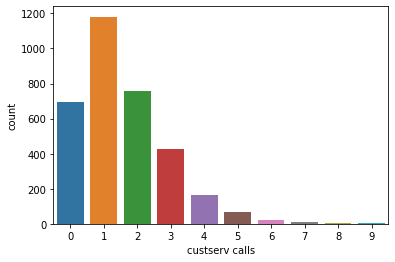

In [227]:
sns.countplot(x='custserv calls',data=df)

In [228]:
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
ID     73
MI     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
WA     66
CO     66
NV     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ND     62
ME     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

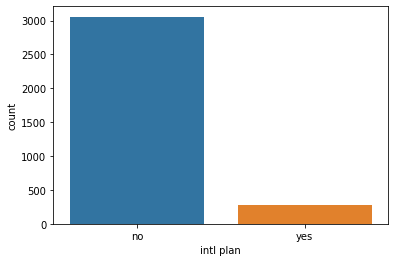

In [98]:
sns.countplot(x='intl plan',data=df)

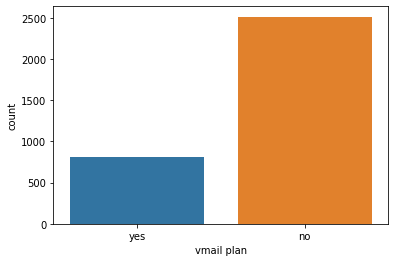

In [99]:
sns.countplot(x='vmail plan',data=df)

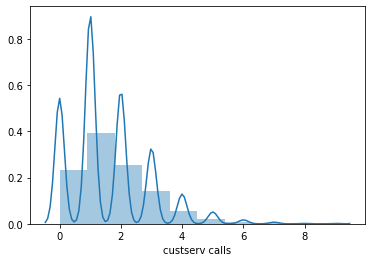

In [121]:
sns.distplot(df[''], bins=10, kde=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
index             3333 non-null float64
state             3333 non-null object
account length    3333 non-null float64
area code         3333 non-null object
phone             3333 non-null object
intl plan         3333 non-null object
vmail plan        3333 non-null object
vmail message     3333 non-null float64
day mins          3333 non-null float64
day calls         3333 non-null float64
day charge        3333 non-null float64
eve mins          3333 non-null float64
eve calls         3333 non-null float64
eve charge        3333 non-null float64
night mins        3333 non-null float64
night calls       3333 non-null float64
night charge      3333 non-null float64
intl mins         3333 non-null float64
intl calls        3333 non-null float64
intl charge       3333 non-null float64
custserv calls    3333 non-null category
churn             3333 non-null object
dtypes: category(1

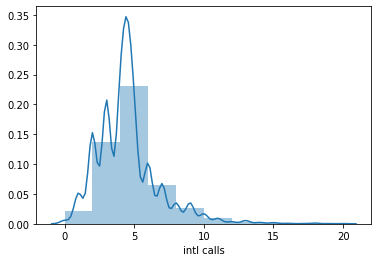

In [478]:
sns.distplot(df['intl calls'], bins=10, kde=True)

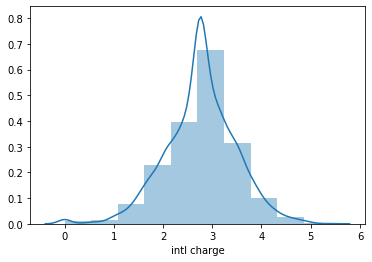

In [120]:
sns.distplot(df['intl charge'], bins=10, kde=True)

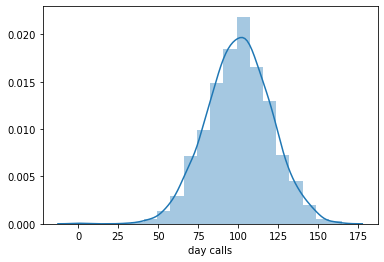

In [109]:
sns.distplot(df['day calls'], bins=20, kde=True)

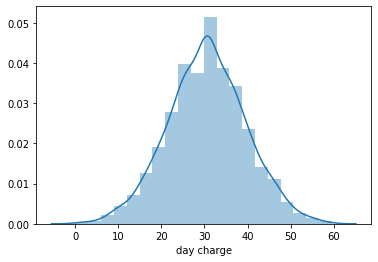

In [110]:
sns.distplot(df['day charge'], bins=20, kde=True)

## INTL calls is skewed

## BI variate analysis

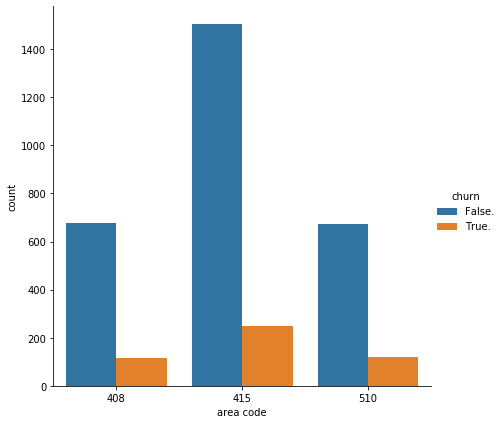

In [126]:
sns.catplot(x="area code", hue="churn", data=df, kind="count", height=6)

## area code 415 has higher no and yes churns

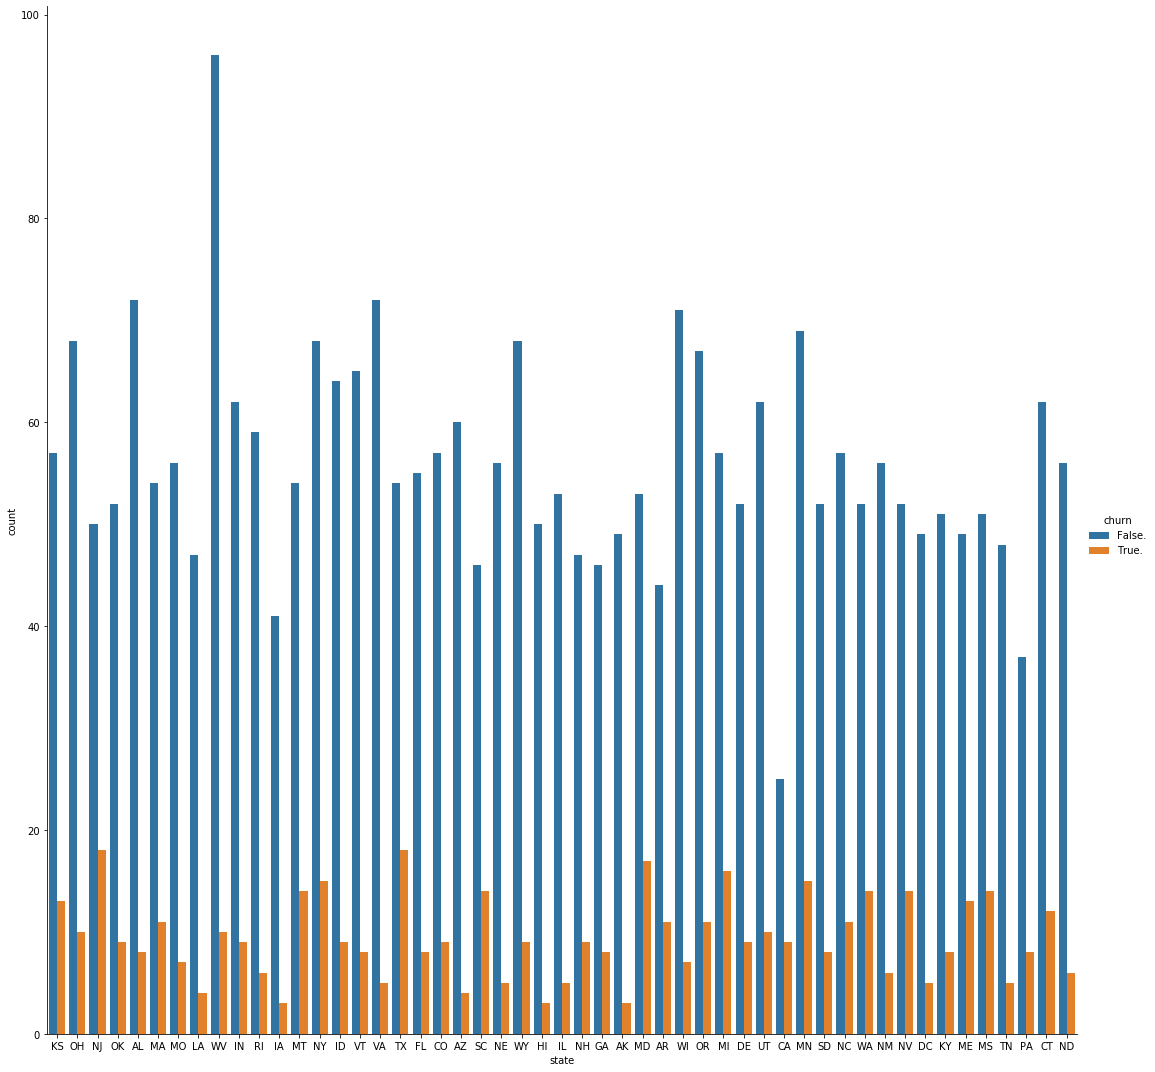

In [128]:
sns.catplot(x="state", hue="churn", data=df, kind="count", height=15)

## WV has higher no churn rate,NJ,TX has equal yes for churning

In [129]:
cat_features

Index(['state', 'area code', 'phone', 'intl plan', 'vmail plan',
       'custserv calls', 'churn'],
      dtype='object')

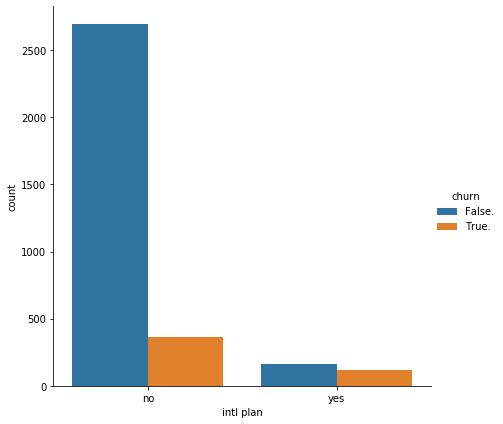

In [131]:
sns.catplot(x="intl plan", hue="churn", data=df, kind="count", height=6)

## customers with no international plan seems to not churn more but there is not big diffrence in people opting a intl plan and churning

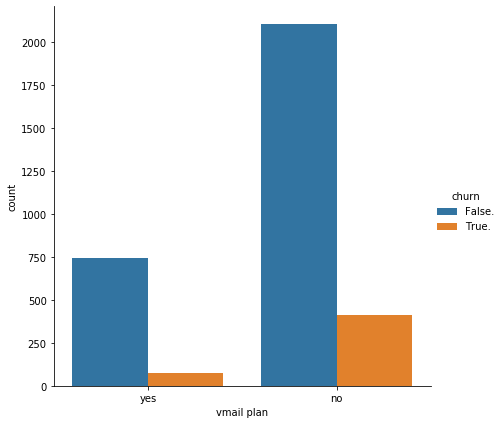

In [132]:
sns.catplot(x="vmail plan", hue="churn", data=df, kind="count", height=6)

## customers with no vmail plan tend not to churn, but not a very usefull feature

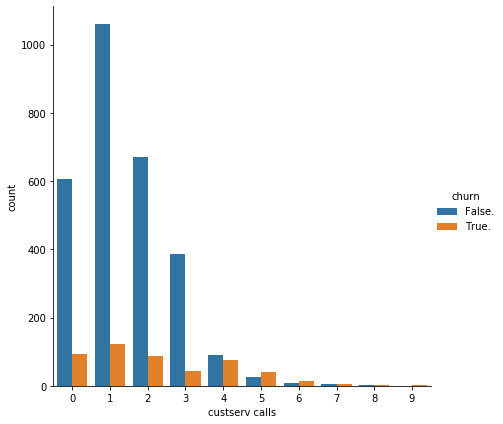

In [133]:
sns.catplot(x="custserv calls", hue="churn", data=df, kind="count", height=6)

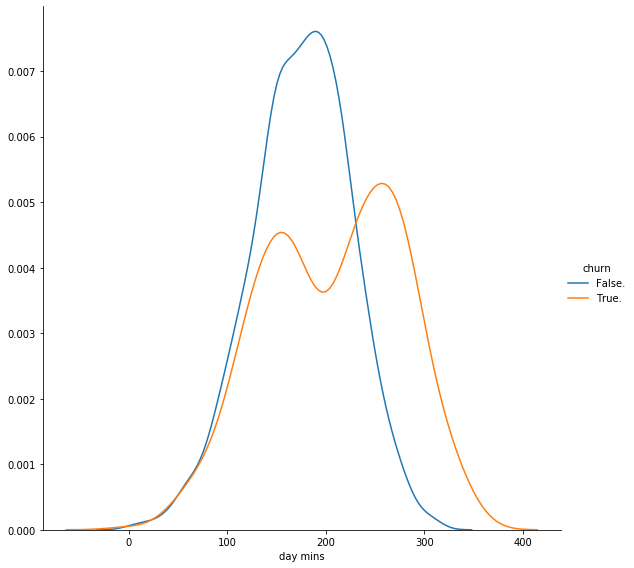

In [137]:
sns.FacetGrid(df, hue="churn",height=8).map(sns.kdeplot, "day mins").add_legend()

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
index             3333 non-null float64
state             3333 non-null object
account length    3333 non-null float64
area code         3333 non-null object
phone             3333 non-null object
intl plan         3333 non-null object
vmail plan        3333 non-null object
vmail message     3333 non-null float64
day mins          3333 non-null float64
day calls         3333 non-null float64
day charge        3333 non-null float64
eve mins          3333 non-null float64
eve calls         3333 non-null float64
eve charge        3333 non-null float64
night mins        3333 non-null float64
night calls       3333 non-null float64
night charge      3333 non-null float64
intl mins         3333 non-null float64
intl calls        3333 non-null float64
intl charge       3333 non-null float64
custserv calls    3333 non-null category
churn             3333 non-null object
dtypes: category(1

In [229]:
##label encoding

In [378]:
le_cat=['state','area code','intl plan','vmail plan','churn']

In [379]:
for col in df[le_cat]:
    le_all=preprocessing.LabelEncoder()
    le_all.fit(df[col])
    print(le_all.classes_)
    df[col]=le_all.transform(df[col])

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
['408' '415' '510']
['no' 'yes']
['no' 'yes']
['False.' 'True.']


In [380]:
df.head()

,index,state,account length,area code,phone,intl plan,vmail plan,vmail message,day mins,day calls,...,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls,churn
0,0.0,16,128.0,1,382-4657,0,1,25.0,265.1,110.0,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1,0
1,1.0,35,107.0,1,371-7191,0,1,26.0,161.6,123.0,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1,0
2,2.0,31,137.0,1,358-1921,0,0,0.0,243.4,114.0,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0,0
3,3.0,35,84.0,0,375-9999,1,0,0.0,299.4,71.0,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2,0
4,4.0,36,75.0,1,330-6626,1,0,0.0,166.7,113.0,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3,0


In [381]:
X=df.drop(['index','phone','vmail message','churn'],axis=1)

In [382]:
X.head()

,state,account length,area code,intl plan,vmail plan,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,night charge,intl mins,intl calls,intl charge,custserv calls
0,16,128.0,1,0,1,265.1,110.0,30.56588,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1
1,35,107.0,1,0,1,161.6,123.0,30.56588,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1
2,31,137.0,1,0,0,243.4,114.0,30.56588,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0
3,35,84.0,0,1,0,299.4,71.0,50.90000,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2
4,36,75.0,1,1,0,166.7,113.0,28.34000,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3


In [235]:
X.shape

(3333, 18)

In [236]:
y=df.churn

In [237]:
from sklearn import ensemble

In [264]:
rf=ensemble.RandomForestClassifier(n_jobs=-1,random_state=44)

In [239]:
from sklearn.model_selection import GridSearchCV

In [240]:
estimator=GridSearchCV(rf,cv=10)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [241]:
from sklearn.model_selection import KFold 
#kf = KFold(n_splits=5, random_state=None) 
scores=[]
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)  
#KFold(n_splits=2, random_state=None, shuffle=False)
for test_index, train_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
    

KFold(n_splits=10, random_state=None, shuffle=False)


In [242]:
print(np.mean(scores))

0.8859545292875403


In [258]:
from sklearn import model_selection
score=[]
score=model_selection.cross_val_score(rf, X, y, cv=10,scoring='accuracy')

In [259]:
print(np.mean(score))

0.9406007804211398


In [247]:
from sklearn.model_selection import train_test_split

In [384]:
gb=ensemble.GradientBoostingClassifier()

In [256]:
from sklearn import model_selection
score=[]
score=model_selection.cross_val_score(gb, X, y, cv=10,scoring='accuracy')

In [257]:
print(np.mean(score))

0.9405980831130532


In [281]:
rf_grid={'bootstrap': [True, False],
 'n_estimators': [200, 400],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [282]:
gv=GridSearchCV(rf,rf_grid,cv=10,n_jobs=-1)

In [283]:
gv.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=44,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'boo

In [284]:
print(gv.best_estimator_)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)


In [285]:
print(gv.best_score_)

0.9441944194419442


In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=2)

In [287]:
gv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=44,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'boo

In [288]:
final_estimator=gv.best_estimator_

In [289]:
pred=final_estimator.predict(X_test)

In [290]:
from sklearn import metrics

In [291]:
acc=metrics.accuracy_score(y_test,pred)

In [292]:
print(acc)

0.9448441247002398


In [293]:
print(metrics.confusion_matrix(y_test,pred))

[[712   6]
 [ 40  76]]


In [294]:
print(metrics.f1_score(y_test,pred))

0.7676767676767676


In [385]:
import xgboost as xgb

In [386]:
xboo=xgb.XGBRFClassifier()

In [428]:
X['custserv calls'] = X['custserv calls'].astype('int32')

In [390]:
X_train['custserv calls'] = X_train['custserv calls'].astype('int32')
X_test['custserv calls'] = X_test['custserv calls'].astype('int32')

C:\Users\vichu\ana3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vichu\ana3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [331]:
xboo.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
                n_jobs=1, nthread=None, objective='binary:logistic',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [332]:
pred=xboo.predict(X_test)

In [328]:
print(metrics.confusion_matrix(y_test,pred))

[[708  10]
 [ 68  48]]


In [304]:
from sklearn import linear_model

In [315]:
lr=linear_model.LogisticRegression(max_iter=300)

In [316]:
lr.fit(X_train,y_train)

C:\Users\vichu\ana3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [317]:
pred=lr.predict(X_test)

In [318]:
print(metrics.confusion_matrix(y_test,pred))

[[707  11]
 [104  12]]


In [319]:
from sklearn import svm

In [320]:
svc=svm.SVC()

In [321]:
svc.fit(X_train,y_train)

C:\Users\vichu\ana3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [322]:
pred=svc.predict(X_test)

In [323]:
print(metrics.confusion_matrix(y_test,pred))

[[718   0]
 [116   0]]


In [333]:
cat_features

Index(['state', 'area code', 'phone', 'intl plan', 'vmail plan',
       'custserv calls', 'churn'],
      dtype='object')

In [334]:
df=pd.get_dummies(df,columns=['area code','intl plan', 'vmail plan','custserv calls'])

In [335]:
df.head()

,index,state,account length,phone,vmail message,day mins,day calls,day charge,eve mins,eve calls,...,custserv calls_0,custserv calls_1,custserv calls_2,custserv calls_3,custserv calls_4,custserv calls_5,custserv calls_6,custserv calls_7,custserv calls_8,custserv calls_9
0,0.0,16,128.0,382-4657,25.0,265.1,110.0,30.56588,197.4,99.0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,35,107.0,371-7191,26.0,161.6,123.0,30.56588,195.5,103.0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,31,137.0,358-1921,0.0,243.4,114.0,30.56588,121.2,110.0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,35,84.0,375-9999,0.0,299.4,71.0,50.90000,61.9,88.0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,36,75.0,330-6626,0.0,166.7,113.0,28.34000,148.3,122.0,...,0,0,0,1,0,0,0,0,0,0


In [337]:
df.columns

Index(['index', 'state', 'account length', 'phone', 'vmail message',
       'day mins', 'day calls', 'day charge', 'eve mins', 'eve calls',
       'eve charge', 'night mins', 'night calls', 'night charge', 'intl mins',
       'intl calls', 'intl charge', 'churn', 'area code_0', 'area code_1',
       'area code_2', 'intl plan_0', 'intl plan_1', 'vmail plan_0',
       'vmail plan_1', 'custserv calls_0', 'custserv calls_1',
       'custserv calls_2', 'custserv calls_3', 'custserv calls_4',
       'custserv calls_5', 'custserv calls_6', 'custserv calls_7',
       'custserv calls_8', 'custserv calls_9'],
      dtype='object')

In [338]:
X=df.drop(['index','phone','vmail message','churn'],axis=1)

In [339]:
X.head()

,state,account length,day mins,day calls,day charge,eve mins,eve calls,eve charge,night mins,night calls,...,custserv calls_0,custserv calls_1,custserv calls_2,custserv calls_3,custserv calls_4,custserv calls_5,custserv calls_6,custserv calls_7,custserv calls_8,custserv calls_9
0,16,128.0,265.1,110.0,30.56588,197.4,99.0,16.78,244.7,91.0,...,0,1,0,0,0,0,0,0,0,0
1,35,107.0,161.6,123.0,30.56588,195.5,103.0,16.62,254.4,103.0,...,0,1,0,0,0,0,0,0,0,0
2,31,137.0,243.4,114.0,30.56588,121.2,110.0,10.30,162.6,104.0,...,1,0,0,0,0,0,0,0,0,0
3,35,84.0,299.4,71.0,50.90000,61.9,88.0,5.26,196.9,89.0,...,0,0,1,0,0,0,0,0,0,0
4,36,75.0,166.7,113.0,28.34000,148.3,122.0,12.61,186.9,121.0,...,0,0,0,1,0,0,0,0,0,0


In [340]:
from sklearn.model_selection import KFold 
#kf = KFold(n_splits=5, random_state=None) 
scores=[]
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)  
#KFold(n_splits=2, random_state=None, shuffle=False)
for test_index, train_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

KFold(n_splits=10, random_state=None, shuffle=False)


C:\Users\vichu\ana3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [343]:
print(np.mean(scores))

0.8698534066911193


In [342]:
from sklearn import model_selection
score=[]
score=model_selection.cross_val_score(rf, X, y, cv=10,scoring='accuracy')

In [344]:
print(np.mean(score))

0.9264938591285897


In [383]:
xg_grid={'n_estimators':range(50,500,50)}

In [387]:
gv_xgb=GridSearchCV(xboo,xg_grid,cv=10)

In [391]:
gv_xgb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRFClassifier(base_score=0.5, colsample_bylevel=1,
                                       colsample_bynode=0.8, colsample_bytree=1,
                                       gamma=0, learning_rate=1,
                                       max_delta_step=0, max_depth=3,
                                       min_child_weight=1, missing=None,
                                       n_estimators=100, n_jobs=1, nthread=None,
                                       objective='binary:logistic',
                                       random_state=0, reg_alpha=0,
                                       reg_lambda=1, scale_pos_weight=1,
                                       seed=None, silent=None, subsample=0.8,
                                       verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(50, 500, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [392]:
print(gv_xgb.best_params_)

{'n_estimators': 100}


In [393]:
xg_grid1={'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}

In [432]:
xboo=xgb.XGBRFClassifier(learning_rate=0.95,n_estimators=1200,n_jobs=-1,max_depth=7,min_samples_leaf=30, min_samples_split=1000,max_features=7,subsample=0.6)

In [398]:
gv_xgb=GridSearchCV(xboo,xg_grid1,cv=10)

In [399]:
gv_xgb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRFClassifier(base_score=0.5, colsample_bylevel=1,
                                       colsample_bynode=0.8, colsample_bytree=1,
                                       gamma=0, learning_rate=1,
                                       max_delta_step=0, max_depth=3,
                                       min_child_weight=1, missing=None,
                                       n_estimators=100, n_jobs=-1,
                                       nthread=None,
                                       objective='binary:logistic',
                                       random_state=0, reg_alpha=0,
                                       reg_lambda=1, scale_pos_weight=1,
                                       seed=None, silent=None, subsample=0.8,
                                       verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(5, 16, 2),
                         'mi

In [400]:
print(gv_xgb.best_params_)

{'max_depth': 7, 'min_samples_split': 200}


In [412]:
xg_grid2={'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

In [413]:
gv_xgb=GridSearchCV(xboo,xg_grid2,cv=10)

In [414]:
gv_xgb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRFClassifier(base_score=0.5, colsample_bylevel=1,
                                       colsample_bynode=0.8, colsample_bytree=1,
                                       gamma=0, learning_rate=1,
                                       max_delta_step=0, max_depth=7,
                                       max_features=7, min_child_weight=1,
                                       min_samples_leaf=30,
                                       min_samples_split=1000, missing=None,
                                       n_estimators=100, n_jobs=-1,
                                       nthread=None,
                                       objective='binary:logistic',
                                       random_state=0, reg_alpha=0,
                                       reg_lambda=1, scale_pos_weight=1,
                                       seed=None, silent=None, subsample=0.8,
                                   

In [415]:
print(gv_xgb.best_params_)

{'subsample': 0.6}


In [418]:
xboo.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=0.5,
                max_delta_step=0, max_depth=7, max_features=7,
                min_child_weight=1, min_samples_leaf=30, min_samples_split=1000,
                missing=None, n_estimators=200, n_jobs=-1, nthread=None,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.6, verbosity=1)

In [419]:
pred=xboo.predict(X_test)

In [420]:
acc=metrics.accuracy_score(y_test,pred)

In [421]:
print(acc)

0.9448441247002398


In [422]:
print(metrics.confusion_matrix(y_test,pred))

[[712   6]
 [ 40  76]]


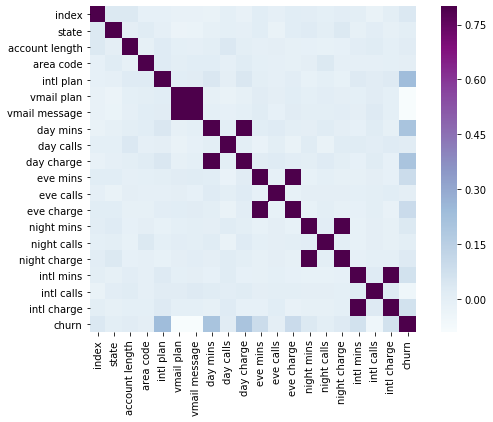

In [423]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [424]:
size =20

#create a dataframe with only 'size' features
data=df.iloc[:,:size] 

#get the names of all the columns
cols=df.columns 

# Calculates pearson co-efficient for all combinations
data_corr = df.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

day charge and eve calls = 0.99
vmail message and day calls = 0.98
eve charge and night calls = 0.96
night charge and intl calls = 0.95
intl plan and vmail plan = 0.88


In [474]:
xboo=xgb.XGBRFClassifier(learning_rate=0.01,n_estimators=1200,n_jobs=-1,max_depth=9,min_samples_leaf=50, min_samples_split=1000,max_features=5,subsample=0.6)

In [475]:
from sklearn.model_selection import KFold 
#kf = KFold(n_splits=5, random_state=None) 
scores=[]
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)  
#KFold(n_splits=2, random_state=None, shuffle=False)
for test_index, train_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xboo.fit(X_train, y_train)
    scores.append(xboo.score(X_test, y_test))
    

KFold(n_splits=10, random_state=None, shuffle=False)


In [476]:
print(np.mean(scores))

0.8878884072468601


In [477]:
from sklearn import ensemble,tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
import xgboost as xgb
from sklearn import linear_model
from sklearn import model_selection
i=1 
scores=[]
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model1=xgb.XGBClassifier(learning_rate=0.01,n_estimators=1200,n_jobs=-1,max_depth=9,min_samples_leaf=50, min_samples_split=1000,max_features=5,subsample=0.6,random_state=42)
    #grid={'learning_rate':[0.1,1,0.5,0.75]}
    #estimator=model_selection.RandomizedSearchCV(model1,grid,random_state=42,n_jobs=-1,scoring='f1',cv=10)
    model1.fit(xtr, ytr)     
    pred_test1 =model1.predict(xvl)    
    score = accuracy_score(yvl,pred_test1)
    scores.append(xboo.score(X_test, y_test))
    matrix=confusion_matrix(yvl,pred_test1)
    f1=f1_score(yvl,pred_test1)
    p=precision_score(yvl,pred_test1)
    r=recall_score(yvl,pred_test1)
    print('accuracy_score',score)
    print('matrix',matrix)
    print('f1',f1)
    print('pres',p)
    print('rec',r)
    i+=1


1 of kfold 10
accuracy_score 0.9520958083832335
matrix [[283   2]
 [ 14  35]]
f1 0.813953488372093
pres 0.9459459459459459
rec 0.7142857142857143

2 of kfold 10
accuracy_score 0.9461077844311377
matrix [[281   4]
 [ 14  35]]
f1 0.7954545454545455
pres 0.8974358974358975
rec 0.7142857142857143

3 of kfold 10
accuracy_score 0.9580838323353293
matrix [[284   1]
 [ 13  36]]
f1 0.8372093023255813
pres 0.972972972972973
rec 0.7346938775510204

4 of kfold 10
accuracy_score 0.933933933933934
matrix [[282   3]
 [ 19  29]]
f1 0.725
pres 0.90625
rec 0.6041666666666666

5 of kfold 10
accuracy_score 0.954954954954955
matrix [[285   0]
 [ 15  33]]
f1 0.8148148148148148
pres 1.0
rec 0.6875

6 of kfold 10
accuracy_score 0.954954954954955
matrix [[283   2]
 [ 13  35]]
f1 0.8235294117647058
pres 0.9459459459459459
rec 0.7291666666666666

7 of kfold 10
accuracy_score 0.924924924924925
matrix [[280   5]
 [ 20  28]]
f1 0.691358024691358
pres 0.8484848484848485
rec 0.5833333333333334

8 of kfold 10
accurac

In [484]:
X=df.drop(['index','phone','vmail message','churn','intl calls'],axis=1)
X['custserv calls'] = X['custserv calls'].astype('int32')

In [487]:
from sklearn import ensemble,tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
import xgboost as xgb
from sklearn import linear_model
from sklearn import model_selection
i=1 
scores=[]
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model1=xgb.XGBClassifier(learning_rate=0.01,n_estimators=1200,n_jobs=-1,max_depth=9,min_samples_leaf=50, min_samples_split=1000,max_features=5,subsample=0.6,random_state=42)
    #grid={'learning_rate':[0.1,1,0.5,0.75]}
    #estimator=model_selection.RandomizedSearchCV(model1,grid,random_state=42,n_jobs=-1,scoring='f1',cv=10)
    model1.fit(xtr, ytr)     
    pred_test1 =model1.predict(xvl)    
    score = accuracy_score(yvl,pred_test1)
    scores.append(accuracy_score(yvl,pred_test1))
    matrix=confusion_matrix(yvl,pred_test1)
    f1=f1_score(yvl,pred_test1)
    p=precision_score(yvl,pred_test1)
    r=recall_score(yvl,pred_test1)
    print('accuracy_score',score)
    print('matrix',matrix)
    print('f1',f1)
    print('pres',p)
    print('rec',r)
    i+=1


1 of kfold 10
accuracy_score 0.937125748502994
matrix [[284   1]
 [ 20  29]]
f1 0.7341772151898733
pres 0.9666666666666667
rec 0.5918367346938775

2 of kfold 10
accuracy_score 0.9311377245508982
matrix [[282   3]
 [ 20  29]]
f1 0.7160493827160493
pres 0.90625
rec 0.5918367346938775

3 of kfold 10
accuracy_score 0.9341317365269461
matrix [[282   3]
 [ 19  30]]
f1 0.7317073170731708
pres 0.9090909090909091
rec 0.6122448979591837

4 of kfold 10
accuracy_score 0.9309309309309309
matrix [[282   3]
 [ 20  28]]
f1 0.7088607594936709
pres 0.9032258064516129
rec 0.5833333333333334

5 of kfold 10
accuracy_score 0.948948948948949
matrix [[284   1]
 [ 16  32]]
f1 0.7901234567901234
pres 0.9696969696969697
rec 0.6666666666666666

6 of kfold 10
accuracy_score 0.9429429429429429
matrix [[283   2]
 [ 17  31]]
f1 0.7654320987654321
pres 0.9393939393939394
rec 0.6458333333333334

7 of kfold 10
accuracy_score 0.9159159159159159
matrix [[279   6]
 [ 22  26]]
f1 0.65
pres 0.8125
rec 0.5416666666666666

8 

In [488]:
print(np.mean(scores))

0.9351944759130388
